In [41]:
cd ~/Downloads/


/Users/arnee/Downloads


In [42]:
import pandas as pd
import seaborn as sns
import numpy as np

In [43]:
df=pd.read_csv("sorted_topology_types",sep="\t")

In [44]:
df=df.sort_values(by="Log10evalue",ascending=True)

df


Pairs           Type  Log10evalue
39   Cons_hypoth698_1:Cons_hypoth698_2         others   -53.431798
103                     SBF_like:SBF_1  same_topology   -34.148742
95   Na_H_Exchanger_1:Na_H_Exchanger_2         others   -31.455932
4                          2HCT:DUF819         others   -30.744727
5                   2HCT:Glt_symporter         others   -29.823909
..                                 ...            ...          ...
56   Cons_hypoth698_2:Na_H_Exchanger_2  br_transition     4.000000
100             Na_H_Exchanger_2:SBF_2         others     4.000000
54    Cons_hypoth698_2:Na_H_antiport_1  br_transition     4.000000
93               Na_H_antiport_1:SBF_2         others     4.000000
21                AbrB:Na_H_antiport_1  br_transition     4.000000

[105 rows x 3 columns]

In [45]:
br=df.loc[df.Type=="br_transition"]
same=df.loc[df.Type=="same_topology"]
others=df.loc[df.Type=="others"]
orientation=df.loc[df.Type=="orientation_changes"]

In [46]:
y=0.02
cutoff=7
last=0
sign=-1

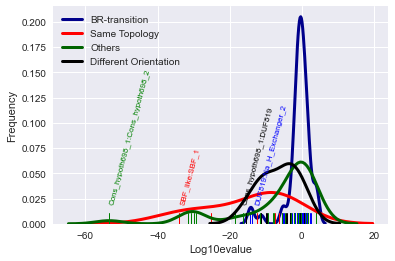

In [47]:
#sns.set_style("white")
sns.set(font_scale=1.)

fontsize=8
rotation=75


ax=sns.distplot(br['Log10evalue'], hist = False, kde = True, rug = True,
             color = 'darkblue', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'blue'},label="BR-transition")

significant=br.loc[br.Log10evalue<sign]

for index, row in significant.iterrows():
    last=row["Log10evalue"]
    ax.text(last+1, y,row["Pairs"],fontsize=fontsize,rotation=rotation,color='blue')
    break
 
ax=sns.distplot(same['Log10evalue'], hist = False, kde = True, rug = True,
             color = 'red', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'red'},label="Same Topology")
significant=same.loc[same.Log10evalue<sign]
for index, row in significant.iterrows():
    last=row["Log10evalue"]
    ax.text(last, y,row["Pairs"],fontsize=fontsize,rotation=rotation,color='red')
    break
 
ax=sns.distplot(others['Log10evalue'], hist = False, kde = True, rug = True,
             color = 'darkgreen', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'green'},label="Others")

significant=others.loc[others.Log10evalue<sign]
for index, row in significant.iterrows():
    last=row["Log10evalue"]
    ax.text(last, y,row["Pairs"],fontsize=fontsize,rotation=rotation,color='green')
    break
 
ax=sns.distplot(orientation['Log10evalue'], hist = False, kde = True, rug = True,
             color = 'black', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'},label="Different Orientation")

significant=orientation.loc[orientation.Log10evalue<sign]
for index, row in significant.iterrows():
    last=row["Log10evalue"]
    ax.text(last-1, y,row["Pairs"],fontsize=fontsize,rotation=rotation,color='black')
    break
#hist_kws={'log':True}
ax.set(ylabel="Frequency")
fig = ax.get_figure()
fig.savefig("transition.png",resolution=600)